In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm

import os
import pathlib
import random

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras import layers, models, utils

In [2]:
IMG_SIZE = 50

DATADIR = "/data/dataset/mnist/trainingSet/trainingSet"

TESTDIR = "/data/dataset/mnist/trainingSample/trainingSample"

CATEGORIES = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

In [3]:
IMG_SIZE = 50

data_train = pathlib.Path(DATADIR)
data_test = pathlib.Path(TESTDIR)

SIZE_OF_DATASET = len(list(data_train.glob('*/*.jpg')))
SIZE_OF_TEST = len(list(data_test.glob('*/*.jpg')))

print("Number of training images: ",SIZE_OF_DATASET)
print("Number of test images: ",SIZE_OF_TEST)

Number of training images:  42000
Number of test images:  600


In [4]:
def prep_data(DATA_DIR, CATEGORIES):
    data = []
    for category in CATEGORIES:

        path = os.path.join(DATA_DIR,category)
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):

            img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            
            data.append([new_array, class_num])
  
        plt.figure(figsize=(1,1))
        plt.imshow(new_array, cmap='gray')
        plt.show()
    return data

In [5]:
def prep_2(data):
    random.shuffle(data)
    X = []
    y = []
    for features,label in data:
        X.append(features)
        y.append(label)

    res = np.eye(10)[y]
        
    X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

    return X, res

100%|██████████| 60/60 [00:01<00:00, 30.11it/s]


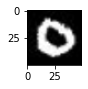

100%|██████████| 60/60 [00:02<00:00, 29.83it/s]


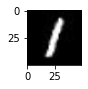

100%|██████████| 60/60 [00:01<00:00, 50.21it/s]


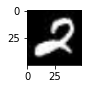

100%|██████████| 60/60 [00:01<00:00, 35.77it/s]


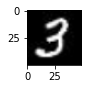

100%|██████████| 60/60 [00:01<00:00, 31.97it/s]


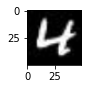

100%|██████████| 60/60 [00:02<00:00, 29.37it/s]


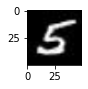

100%|██████████| 60/60 [00:01<00:00, 37.53it/s]


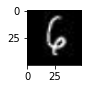

100%|██████████| 60/60 [00:01<00:00, 34.54it/s]


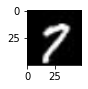

100%|██████████| 60/60 [00:01<00:00, 40.01it/s]


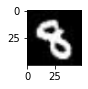

100%|██████████| 60/60 [00:01<00:00, 37.72it/s]


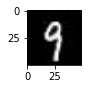

100%|██████████| 4132/4132 [01:31<00:00, 44.99it/s]


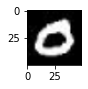

100%|██████████| 4684/4684 [01:39<00:00, 47.11it/s]


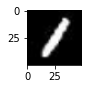

100%|██████████| 4177/4177 [01:20<00:00, 51.72it/s]


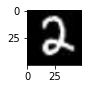

100%|██████████| 4351/4351 [01:19<00:00, 54.40it/s]


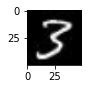

100%|██████████| 4072/4072 [01:16<00:00, 53.54it/s]


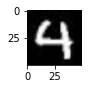

100%|██████████| 3795/3795 [01:04<00:00, 58.42it/s]


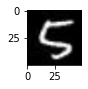

100%|██████████| 4137/4137 [01:14<00:00, 55.56it/s]


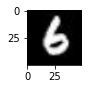

100%|██████████| 4401/4401 [01:13<00:00, 59.95it/s]


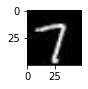

100%|██████████| 4063/4063 [01:02<00:00, 64.98it/s]


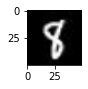

100%|██████████| 4188/4188 [01:06<00:00, 63.23it/s]


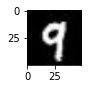

In [6]:
data = prep_data(TESTDIR, CATEGORIES)
tX, ty = prep_2(data)

data2 = prep_data(DATADIR, CATEGORIES)
X, y = prep_2(data2)

In [7]:
X=np.array(X      /255.0)
y=np.array(y)

tX=np.array(tX    /255.0)
ty=np.array(ty)

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(8, (12, 12), activation='relu', input_shape=(X.shape[1:])))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(16, (6, 6), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add( layers.Flatten( ) )
model.add( layers.Dense(256, activation='relu') )
model.add( layers.Dense(128, activation='relu') )
model.add( layers.Dense(64, activation='relu') )
model.add( layers.Dense(10, activation='softmax') )

In [9]:
#opt = tf.keras.optimizers.SGD(
#    learning_rate=0.01, momentum=0.1, nesterov=False, name="SGD")

model.compile(loss='categorical_crossentropy', optimizer='adam',  metrics=['accuracy'])

BATCH_SIZE = 2000
EPOCHS = 50

history = model.fit(X, y, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(tX, ty))

Epoch 1/50
21/21 [==============================] - 13s 636ms/step - loss: 1.7233 - accuracy: 0.4715 - val_loss: 0.7856 - val_accuracy: 0.7783
Epoch 2/50
21/21 [==============================] - 13s 609ms/step - loss: 0.5865 - accuracy: 0.8240 - val_loss: 0.5056 - val_accuracy: 0.8383
Epoch 3/50
21/21 [==============================] - 13s 607ms/step - loss: 0.3748 - accuracy: 0.8886 - val_loss: 0.3191 - val_accuracy: 0.9033
Epoch 4/50
21/21 [==============================] - 13s 596ms/step - loss: 0.2734 - accuracy: 0.9182 - val_loss: 0.2458 - val_accuracy: 0.9267
Epoch 5/50
21/21 [==============================] - 13s 607ms/step - loss: 0.2195 - accuracy: 0.9327 - val_loss: 0.2005 - val_accuracy: 0.9350
Epoch 6/50
21/21 [==============================] - 13s 600ms/step - loss: 0.1844 - accuracy: 0.9445 - val_loss: 0.1738 - val_accuracy: 0.9417
Epoch 7/50
21/21 [==============================] - 13s 600ms/step - loss: 0.1568 - accuracy: 0.9522 - val_loss: 0.1429 - val_accuracy: 0.9483

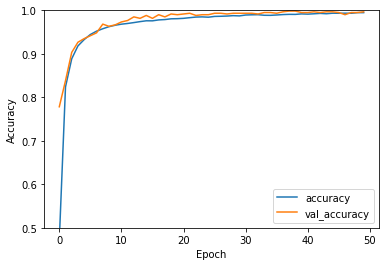

In [10]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [11]:
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
    return new_array, new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

def plot_image(prediction_array, true_label, img):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap='gray')
    predicted_label = np.argmax(prediction_array)        
    if predicted_label == true_label:
        color = 'green'
    else:
        color = 'red'
    plt.xlabel("Classe - {} | {:2.0f}% ({})".format(predicted_label,100*np.max(prediction_array),true_label), color=color)

def plot_value_array(prediction_array, true_label):
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), prediction_array, color= "#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(prediction_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('green')

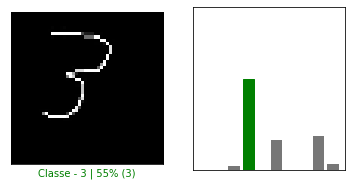

Classe - 0 | Confiança - 0.1 %
Classe - 1 | Confiança - 0.12 %
Classe - 2 | Confiança - 2.21 %
Classe - 3 | Confiança - 55.48 %
Classe - 4 | Confiança - 0.04 %
Classe - 5 | Confiança - 18.16 %
Classe - 6 | Confiança - 0.01 %
Classe - 7 | Confiança - 0.07 %
Classe - 8 | Confiança - 20.4 %
Classe - 9 | Confiança - 3.4 %


In [24]:
DIR = 'previsao3.jpg'
IMG_SIZE = 50
true_label = 3

xp, Xp = prepare(DIR)
Xp=np.array(Xp/255.0)
prediction = model.predict( Xp )
prev = prediction[0]

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)

plot_image(prediction[0], true_label, xp)
plt.subplot(1,2,2)
plot_value_array(prediction[0],  true_label)
plt.show()

for i in range( len(prev) ):
    print( 'Classe - {} | Confiança - {} %'.format(i,  np.round(prev[i]*100, 2) ) )

Filtros da 1° camada


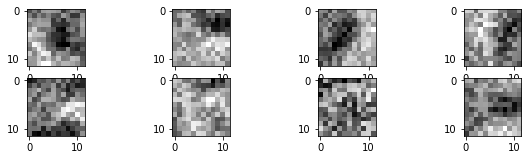

Filtros da 3° camada


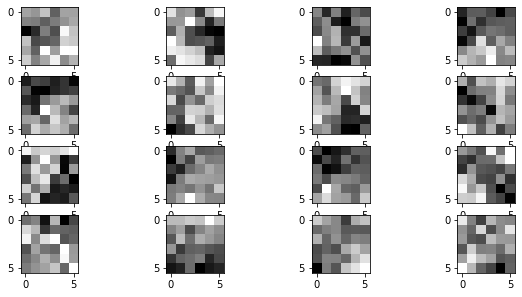

Filtros da 5° camada


In [ ]:
k=0
for layer in model.layers:

    if 'conv' in layer.name: 

        fig= plt.figure(figsize=(10,10))

        filter_, bias_= layer.get_weights()

        f_min, f_max = filter_.min(), filter_.max()
        filter_ = (filter_ - f_min) / (f_max - f_min)

        print('Filtros da {}° camada'.format(k+1))
        
        for i in range(filter_.shape[3]):

            p = filter_[:,:,0,i]
             
            
            ax = fig.add_subplot(8,4,i+1)
            ax.imshow(p, cmap='gray')
            

            #plt.subplot(5,5,i+1)
            #plt.xticks([])
            #plt.yticks([])
            #plt.grid(False)    
            #plt.imshow(p, cmap=plt.cm.binary)
        plt.show()
    k=k+1

In [ ]:
from tensorflow.keras.models import Model

inp= model.inputs 

k=0
for layer in model.layers:
    if 'conv' in layer.name: 
        fig= plt.figure(figsize=(10,10))
        out = layer.output
        feature_map= Model(inputs= inp, outputs= out) 
        f = feature_map.predict(Xp)
        print('Ativação na {}° camada'.format(k+1))
        
        for i in range(f.shape[3]):

            p = f[0,:,:,i]
                         
            ax = fig.add_subplot(8,4,i+1)
            ax.imshow(p, cmap='gray')
            
            #plt.subplot(5,5,i+1)
            #plt.xticks([])
            #plt.yticks([])
            #plt.grid(False)   
            #plt.imshow(p, cmap=plt.cm.binary)

        plt.show()
    k=k+1

In [ ]:
for layer in model.layers:
    print(layer.name)

'''i=1
for layer in model.layers:
    if 'conv' in layer.name: 
        filters, bias= layer.get_weights()
        print('Filters Shape: '+ str(filters.shape, )+" " + 'Bias Shape: '+str(bias.shape)+ "<---- layer: "+str(i))
        print("-----------")
        i=i+1'''

'''from tensorflow.keras.models import Model

inp= model.inputs 
print(inp)

out1= model.layers[0]. output  
print(out1)

feature_map_1= Model(inputs= inp, outputs= out1)  
feature_map_1.summary()


f1=feature_map_1.predict(Xp)        # predicting out the Image 
print(f1.shape)# Let's see the shape'''

In [ ]:
#model.save('melhor_modelo_resultado_perfeito.h5')